In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.model_selection import train_test_split


In [ ]:
# keypoint
# Linear Regression에서 alpha를 증가시키거나 Classfication에서 C 값을 감소시켜
# "규제"의 강도를 증가시킨다면 과적합 문제가 발생할 수 있다.(훈련 모델의 성능 향상)
# 반대로 "규제"의 강도를 줄이면 일반화 성능이 좋아진다.
# Ridge가 L2 규제를사용하기 때문에 Lasso 보다 자주 쓰인다.

In [20]:
#선형회기 Linear Regression
from sklearn.linear_model import LinearRegression

#Wave DataSet은 종속변수 1개, 독립변수 1개로 구성
X, y = mglearn.datasets.make_wave(n_samples=60)
#plt.plot(X,y,'o')

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

#모델생성 선형회기는 매개변수(x)
lr = LinearRegression().fit(X_train, y_train)
print("coef: {}\nintercept: {}".format(lr.coef_,lr.intercept_))
#coef는 종속변수에 한개씩 대응(NumPy 배열)
#intercept는 Float 실수값

print("Training Accuracy: {:.2f}".format(lr.score(X_train,y_train)))
print("Teat Accuracy: {:.2f}".format(lr.score(X_test,y_test)))



coef: [0.39390555]
intercept: -0.031804343026759746
Training Accuracy: 0.67
Teat Accuracy: 0.66


In [7]:
#Boston DataSet
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

lr = LinearRegression().fit(X_train,y_train)

print("훈련모델 정확도: ",lr.score(X_train,y_train))
print("테스트모델 정확도: ",lr.score(X_test,y_test))
# => 선형회기의 경우 특성이 많은 데이터에 OverFitting이 발생하는것을 확인


훈련모델 정확도:  0.9520519609032727
테스트모델 정확도:  0.6074721959665943


In [8]:
#리지 회귀 Ridge Regression
#Linear Regression의 OverFitting 문제를 해결하기위해 가중치 "규제"의 개념이 추가됨 규제가 높을수록 단순화

#기존 boston DataSet 사용
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # Alpha 기본값 1.0

print("Training Accuracy: ",ridge.score(X_train,y_train))
print("Test Accuracy: ",ridge.score(X_test,y_test) 

Training Accuracy:  0.8857966585170941
Test Accuracy:  0.7527683481744749


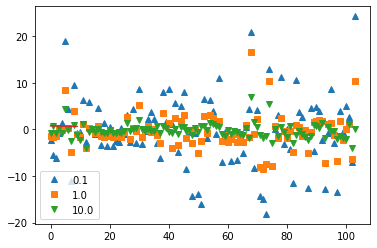

In [20]:
#Aplha 값에 따라 가중치 결정

ridge1 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge2 = Ridge(alpha=1.0).fit(X_train,y_train)
ridge3 = Ridge(alpha=10.0).fit(X_train,y_train)

plt.plot(ridge1.coef_,'^',label="0.1")
plt.plot(ridge2.coef_,'s',label="1.0")
plt.plot(ridge3.coef_,'v',label="10.0")
plt.legend(loc=3)
# => alpha 값이 증가함에 따라 가중치(W) 값이 작아지는것을 확인

alpha_setting = range(1,11)
test_result = []
for i in alpha_setting:
    ridge = Ridge(alpha=i).fit(X_train,y_train)
    test_result.append(ridge.score(X_test,y_test))

plt.plot(test_result)


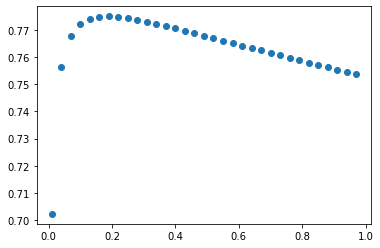

In [31]:
alpha_setting = np.arange(0.01,1,0.03)
test_result = []
for i in alpha_setting:
    ridge = Ridge(alpha=i).fit(X_train,y_train)
    test_result.append(ridge.score(X_test,y_test))

plt.plot(alpha_setting,test_result,'o')
#=> alpha가 0.2 일때 정확도가 최대임을 확인

In [34]:
#라소 회기 Lasso Regression
#Lasso는 가중치(W)의 값이 0이되어 특성 선택이 되는 특징이 있는 반면 Ridge는 0이 되지는 않음
#중요도가 비슷한 특성들의 DataSet인 경우 Ridge 사용

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train,y_train)
print("훈련모델 정확도: ",lasso.score(X_train,y_train))
print("테스트모델 정확도: ",lasso.score(X_test,y_test))
print("사용된 특성의 갯수: ",np.sum(lasso.coef_!=0))
#과소적합 문제발생 (Alpha=1.0, 사용된특성: 4)

훈련모델 정확도:  0.29323768991114607
테스트모델 정확도:  0.20937503255272294
사용된 특성의 갯수:  4


<ipython-input-45-56f255dc3566>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso2 = Lasso(alpha=i,max_iter=50000).fit(X_train,y_train)
C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778.8596361667154, tolerance: 3.233182126649076
  model = cd_fast.enet_coordinate_descent(


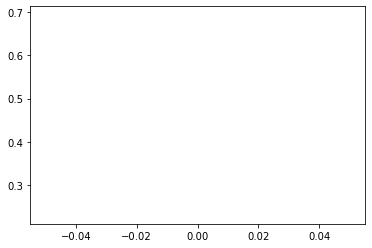

In [45]:
alpha_setting = np.arange(0,,0.05)
test_result = []
for i in alpha_setting:
    lasso2 = Lasso(alpha=i,max_iter=50000).fit(X_train,y_train)
    test_result.append(lasso2.score(X_test,y_test))
    #print("훈련모델 정확도: ",lasso2.score(X_train,y_train))
    #print("테스트모델 정확도: ",lasso2.score(X_test,y_test))
    #print("사용된 특성의 갯수: ",np.sum(lasso2.coef_!=0))

plt.plot(alpha_setting,test_result,'o')

C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy:  0.9859154929577465
Test Accuracy:  0.9790209790209791


C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


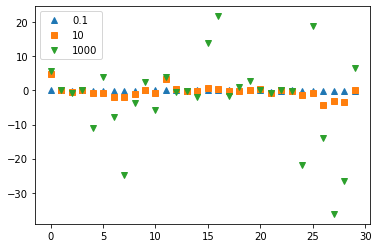

In [106]:
#분류용 선형모델
#Classification 모델과 달리 Regression 모델은 참과거짓이 없기 때문에 Accuracy는 표준편차제곱의 값의 크기를 기반으로 정확도가 계산됨
#SVM(Support Vector Machine) 과 Logistic 분류방법
#C 값을 매개변수로 규제값을 조정

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#유방암 데이터셋 사용
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# print(cancer.keys())
# print(cancer.data.shape,cancer.target)

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=42)
log = LogisticRegression(C=1000,max_iter=5000).fit(X_train,y_train)
print("Training Accuracy: ",log.score(X_train, y_train))
print("Test Accuracy: ",log.score(X_test, y_test))

log1 = LogisticRegression(C=0.1,max_iter=5000).fit(X_train,y_train)
log2 = LogisticRegression(C=10,max_iter=5000).fit(X_train,y_train)
log3 = LogisticRegression(C=1000,max_iter=5000).fit(X_train,y_train)

plt.plot(log1.coef_.T,'^',label=0.1)
plt.plot(log2.coef_.T,'s',label=10)
plt.plot(log3.coef_.T,'v',label=1000)
plt.legend()



In [178]:
#SVM을 이용해 다중 분류기 생성
#이중 분류 모델은 1개의 선형모델을 기준으로 정해졌지만 다중 분류 모델은 각각의 비교를 위해 클래스 1개당 1개의 모델이 배정
#클래스 0의 데이터는 클래스0 분류모델에서는 양수, 클래스1, 클래스2 분류모델에서는 음수가 나와야함
#사실 3개의 모델중 가장 높은 결과값의 클래스로 분류함

from sklearn.datasets import make_blobs

X, y = make_blobs()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
#2개의 특성을 가지고 3개의 클래스로 분류되는 데이터
#print(X.shape,y)

svm = LinearSVC().fit(X_train,y_train)
print("coef\n",svm.coef_)
print("intercept\n",svm.intercept_)

print("Accuracy: ",svm.score(X_test,y_test))



coef
 [[-7.19055875e-01  8.88054559e-01]
 [ 7.75949230e-01 -1.27387229e-01]
 [ 5.18511860e-04 -9.43551540e-02]]
intercept
 [-0.60507485 -0.26287032 -0.53816013]
Accuracy:  0.84


C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
